In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transforms

In [61]:
from scipy import fftpack

Sine wave with random noise

In [63]:
time_step = 0.05
time_vac = np.arange(0,10, time_step)
time_vac

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.

In [67]:
sig = (np.sin(2*np.pi*time_vac))
sig

array([ 0.00000000e+00,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  1.22464680e-16, -3.09016994e-01,
       -5.87785252e-01, -8.09016994e-01, -9.51056516e-01, -1.00000000e+00,
       -9.51056516e-01, -8.09016994e-01, -5.87785252e-01, -3.09016994e-01,
       -2.44929360e-16,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  3.67394040e-16, -3.09016994e-01,
       -5.87785252e-01, -8.09016994e-01, -9.51056516e-01, -1.00000000e+00,
       -9.51056516e-01, -8.09016994e-01, -5.87785252e-01, -3.09016994e-01,
       -4.89858720e-16,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  6.12323400e-16, -3.09016994e-01,
       -5.87785252e-01, -

Every 5 step - 1/4 cycle

20 step to generate  a complete cycle

In [69]:
np.round(sig,2)

array([ 0.  ,  0.31,  0.59,  0.81,  0.95,  1.  ,  0.95,  0.81,  0.59,
        0.31,  0.  , -0.31, -0.59, -0.81, -0.95, -1.  , -0.95, -0.81,
       -0.59, -0.31, -0.  ,  0.31,  0.59,  0.81,  0.95,  1.  ,  0.95,
        0.81,  0.59,  0.31,  0.  , -0.31, -0.59, -0.81, -0.95, -1.  ,
       -0.95, -0.81, -0.59, -0.31, -0.  ,  0.31,  0.59,  0.81,  0.95,
        1.  ,  0.95,  0.81,  0.59,  0.31,  0.  , -0.31, -0.59, -0.81,
       -0.95, -1.  , -0.95, -0.81, -0.59, -0.31, -0.  ,  0.31,  0.59,
        0.81,  0.95,  1.  ,  0.95,  0.81,  0.59,  0.31,  0.  , -0.31,
       -0.59, -0.81, -0.95, -1.  , -0.95, -0.81, -0.59, -0.31, -0.  ,
        0.31,  0.59,  0.81,  0.95,  1.  ,  0.95,  0.81,  0.59,  0.31,
        0.  , -0.31, -0.59, -0.81, -0.95, -1.  , -0.95, -0.81, -0.59,
       -0.31, -0.  ,  0.31,  0.59,  0.81,  0.95,  1.  ,  0.95,  0.81,
        0.59,  0.31,  0.  , -0.31, -0.59, -0.81, -0.95, -1.  , -0.95,
       -0.81, -0.59, -0.31, -0.  ,  0.31,  0.59,  0.81,  0.95,  1.  ,
        0.95,  0.81,

To get 100 points for one cycle divide it by 5

In [73]:
period= 5
sig= np.round(np.sin(2*np.pi*time_vac/period),2)

array([ 0.  ,  0.06,  0.13,  0.19,  0.25,  0.31,  0.37,  0.43,  0.48,
        0.54,  0.59,  0.64,  0.68,  0.73,  0.77,  0.81,  0.84,  0.88,
        0.9 ,  0.93,  0.95,  0.97,  0.98,  0.99,  1.  ,  1.  ,  1.  ,
        0.99,  0.98,  0.97,  0.95,  0.93,  0.9 ,  0.88,  0.84,  0.81,
        0.77,  0.73,  0.68,  0.64,  0.59,  0.54,  0.48,  0.43,  0.37,
        0.31,  0.25,  0.19,  0.13,  0.06,  0.  , -0.06, -0.13, -0.19,
       -0.25, -0.31, -0.37, -0.43, -0.48, -0.54, -0.59, -0.64, -0.68,
       -0.73, -0.77, -0.81, -0.84, -0.88, -0.9 , -0.93, -0.95, -0.97,
       -0.98, -0.99, -1.  , -1.  , -1.  , -0.99, -0.98, -0.97, -0.95,
       -0.93, -0.9 , -0.88, -0.84, -0.81, -0.77, -0.73, -0.68, -0.64,
       -0.59, -0.54, -0.48, -0.43, -0.37, -0.31, -0.25, -0.19, -0.13,
       -0.06, -0.  ,  0.06,  0.13,  0.19,  0.25,  0.31,  0.37,  0.43,
        0.48,  0.54,  0.59,  0.64,  0.68,  0.73,  0.77,  0.81,  0.84,
        0.88,  0.9 ,  0.93,  0.95,  0.97,  0.98,  0.99,  1.  ,  1.  ,
        1.  ,  0.99,

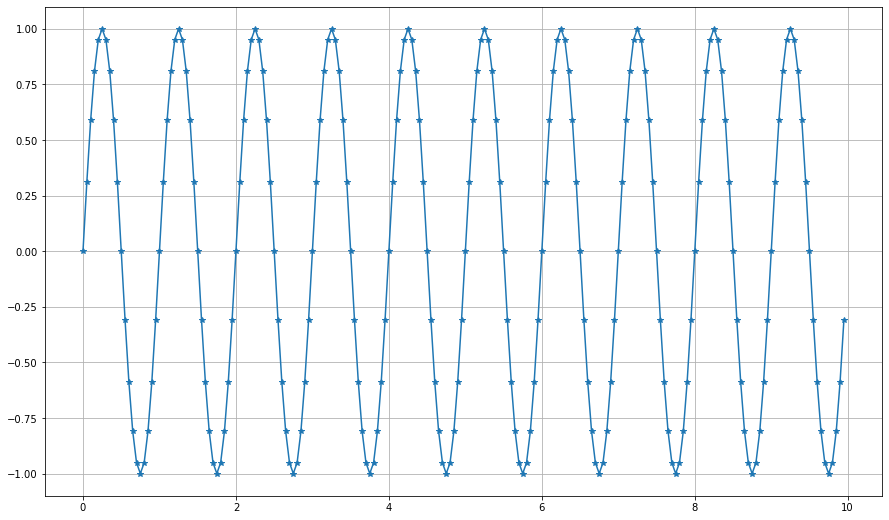

In [80]:
fig = plt.figure(figsize=(15,9))
ax = fig.subplots()
ax.plot(time_vac,sig, marker='*')
ax.grid()
plt.show()

Add noise to the signal

Return sample from the "standard normal" distribution of mean 0 and varaiance 1

In [74]:
np.random.randn(time_vac.size)

array([ 4.07234240e-01, -1.13400750e+00,  8.92031063e-01, -6.80619388e-01,
        8.03146672e-02,  6.93534255e-01, -1.17022766e+00,  3.85519168e-01,
       -1.02021432e+00, -6.13804981e-01,  1.12278703e+00, -5.30971753e-01,
        2.91175436e-01,  2.29448323e+00,  1.16758071e-01, -5.44859206e-01,
        9.64756716e-01,  2.02110010e-01, -1.26405864e+00,  5.45486424e-01,
        1.28473234e+00,  4.93978525e-01, -1.96841229e-01, -3.14067360e-01,
        1.86694778e-01, -7.66195916e-01,  6.72571599e-01, -2.06471689e-01,
        6.11680480e-01,  3.97915400e-01, -4.55227692e-02, -4.20094412e-01,
        3.24435045e-01,  1.02718306e+00, -2.50199973e+00,  1.27213435e-01,
        8.49860236e-02,  9.57995232e-01,  1.48513160e-01,  1.10919123e+00,
        2.46113403e+00,  1.12543621e+00, -1.52391371e-02, -8.09021418e-01,
       -1.98002691e-01, -9.26914226e-01, -1.10678246e+00,  4.44855615e-01,
        7.56404131e-01,  4.40709118e-01,  1.06058806e+00,  7.33185315e-01,
       -1.19096707e+00,  

Reduce the value of noise multiply by 0.25

In [81]:
noise = 0.25*np.random.randn(time_vac.size)
noise

array([-3.33915894e-02,  8.09190777e-02,  1.15360659e-01, -3.95081568e-01,
        1.03599869e-01,  1.03799616e-02, -2.01690250e-02, -9.04921363e-02,
        3.19091333e-01, -2.64054771e-03, -5.23786242e-01,  1.24473045e-01,
        4.43860136e-01, -2.40270113e-01,  1.26542952e-02,  1.79286293e-01,
       -4.05229364e-01, -1.60044643e-01, -5.15503285e-03,  2.07462408e-01,
        2.23317238e-01,  7.30964367e-02,  3.13180343e-01, -1.84614221e-01,
        2.71630074e-01,  5.92551465e-01,  3.98765168e-02,  2.40374918e-01,
       -3.95400156e-01, -5.72450956e-02, -3.22932720e-01,  4.61120879e-01,
        3.57906595e-01, -4.03616551e-01, -5.40447102e-02, -2.96213916e-02,
        6.14023785e-02, -1.99011128e-01,  2.77478621e-01,  6.29371854e-02,
       -1.75742544e-01,  1.89072031e-01,  3.35693014e-02,  6.58544568e-01,
       -1.49177600e-02,  9.57276238e-02,  3.85963808e-01,  2.54033521e-01,
       -3.88336643e-01,  4.55601345e-02,  6.49925412e-02, -3.61600340e-01,
        2.18255844e-01,  

In [83]:
sig_noise = sig+noise

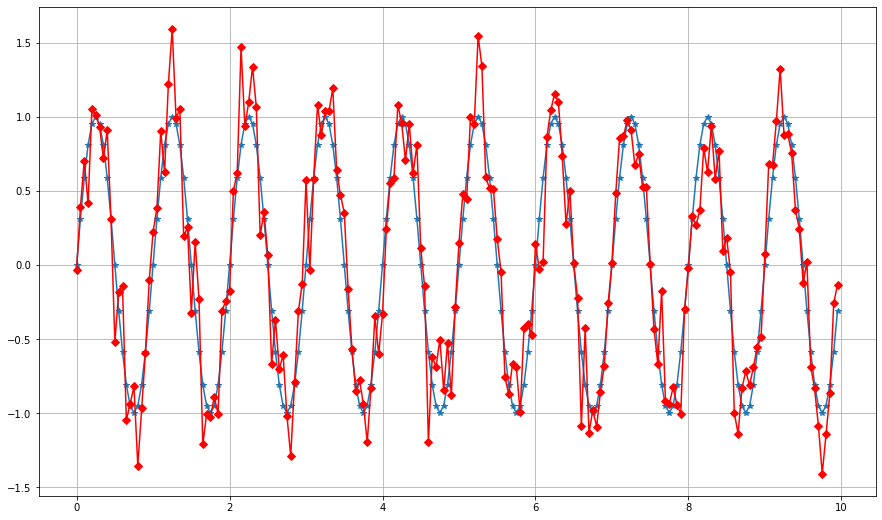

In [85]:
fig = plt.figure(figsize=(15,9))
ax = fig.subplots()
ax.plot(time_vac,sig, marker='*')
ax.plot(time_vac,sig_noise,color='r', marker='D')

ax.grid()
plt.show()

## Return discrete Fouriere transform of real or complex sequence

In [87]:
sig_fft = fftpack.fft(sig)
sig_fft

array([ 2.08438717e-16-0.00000000e+00j, -9.09714126e-15-9.80272136e-15j,
        1.77365578e-14-7.53743935e-15j,  2.56103464e-15-4.71346980e-15j,
        2.78544085e-14+4.60877272e-16j, -4.55522243e-15+1.82636274e-14j,
        1.27338105e-15+1.06821581e-15j,  5.96136562e-15-5.43056078e-15j,
        1.66483989e-14-1.13651070e-15j, -9.24281105e-15+6.77425699e-15j,
        2.58684253e-14-1.00000000e+02j,  7.16472130e-16-1.29233406e-14j,
        9.76265395e-15+9.78613123e-16j,  1.23662963e-14+2.13669329e-14j,
        5.35130477e-15+8.12081194e-15j, -3.61840985e-15-4.52090207e-15j,
        2.46543667e-14+5.76962873e-15j,  7.02551932e-15+1.69862562e-14j,
        2.22721782e-14+1.81473761e-14j, -1.16028612e-14+3.98323813e-14j,
       -2.29388916e-14+5.47834969e-15j, -1.31165196e-14-4.70440239e-16j,
       -1.92353306e-15-2.82382064e-15j, -7.17487441e-15+8.08470102e-15j,
        1.79484175e-14+1.19335922e-14j, -1.56783481e-14+2.61073750e-14j,
       -1.78681009e-14-1.04594090e-14j, -9.54927980

In [88]:
amplitude = np.abs(sig_fft)
amplitude

array([2.08438717e-16, 1.33735308e-14, 1.92717014e-14, 5.36429827e-15,
       2.78582211e-14, 1.88231278e-14, 1.66210238e-15, 8.06404802e-15,
       1.66871460e-14, 1.14594988e-14, 1.00000000e+02, 1.29431861e-14,
       9.81157968e-15, 2.46874686e-14, 9.72543312e-15, 5.79063427e-15,
       2.53204742e-14, 1.83818068e-14, 2.87293784e-14, 4.14878897e-14,
       2.35840001e-14, 1.31249533e-14, 3.41671516e-15, 1.08093114e-14,
       2.15535685e-14, 3.04533353e-14, 2.07043055e-14, 1.86485451e-14,
       2.63646226e-14, 2.53219216e-14, 3.64559157e-14, 3.88653116e-14,
       3.43290859e-14, 1.51783868e-14, 2.41493884e-14, 1.89015492e-14,
       1.81992838e-14, 3.57901369e-15, 1.60808758e-14, 2.42112928e-14,
       2.57967954e-14, 7.52217424e-15, 6.95737316e-15, 1.24164887e-14,
       1.37110621e-14, 1.17670314e-14, 1.02918581e-14, 2.26068312e-14,
       1.89927791e-14, 1.46115630e-14, 1.87608742e-14, 4.65001074e-14,
       4.50749832e-14, 1.95365752e-14, 4.28490227e-14, 2.66355708e-14,
      

Power Spectrum 

In [90]:
power=amplitude**2
power

array([4.34466986e-32, 1.78851325e-28, 3.71398475e-28, 2.87756959e-29,
       7.76080482e-28, 3.54310138e-28, 2.76258431e-30, 6.50288705e-29,
       2.78460842e-28, 1.31320114e-28, 1.00000000e+04, 1.67526065e-28,
       9.62670957e-29, 6.09471104e-28, 9.45840493e-29, 3.35314453e-29,
       6.41126414e-28, 3.37890822e-28, 8.25377183e-28, 1.72124499e-27,
       5.56205061e-28, 1.72264400e-28, 1.16739425e-29, 1.16841213e-28,
       4.64556314e-28, 9.27405630e-28, 4.28668266e-28, 3.47768236e-28,
       6.95093323e-28, 6.41199714e-28, 1.32903379e-27, 1.51051244e-27,
       1.17848614e-27, 2.30383425e-28, 5.83192958e-28, 3.57268562e-28,
       3.31213932e-28, 1.28093390e-29, 2.58594566e-28, 5.86186699e-28,
       6.65474651e-28, 5.65831054e-29, 4.84050413e-29, 1.54169192e-28,
       1.87993224e-28, 1.38463028e-28, 1.05922343e-28, 5.11068818e-28,
       3.60725657e-28, 2.13497772e-28, 3.51970400e-28, 2.16225999e-27,
       2.03175411e-27, 3.81677770e-28, 1.83603874e-27, 7.09453630e-28,
      

Phase spectrum 

In [91]:
angle = np.angle(sig_fft)
angle

array([-0.        , -2.31887927, -0.4018421 , -1.07307779,  0.01654443,
        1.81522432,  0.69800369, -0.73883701, -0.06815972,  2.50911154,
       -1.57079633, -1.51541286,  0.09990675,  1.04614194,  0.98814685,
       -2.24576492,  0.22988358,  1.17862088,  0.68370055,  1.85424527,
        2.90716026, -3.10574178, -2.16878014,  2.29664167,  0.58676653,
        2.11160787, -2.61200168, -2.10838429, -0.61687155,  1.30337322,
        3.03414026,  0.0911597 ,  2.87251868,  2.40912538, -2.59010276,
       -1.76987532, -0.63151289,  1.11748083, -0.36422357,  1.0746719 ,
        3.02977323, -1.56137399,  1.42009166,  2.77037436,  0.1147972 ,
        2.19251142, -1.77998252, -1.77345963,  0.57711203,  0.26285947,
        2.81632871,  0.92420318,  3.06407893, -2.86161908, -2.40781422,
       -0.97544109, -0.67627994,  1.97432581, -1.80378371, -0.66501479,
       -0.22169409, -0.47430683,  0.49263719,  1.15851243, -0.24645516,
        1.29281749,  0.58409084,  1.27295238,  1.72019868,  2.44

compte the corresponding frequency for the amplitude

In [92]:
sig.size

200

In [93]:
time_step

0.05

In [94]:
samp_freq = fftpack.fftfreq(sig.size, d= time_step)
samp_freq

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9, -10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,
        -9.2,  -9.1,  -9. ,  -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,
        -8.3,  -8.2,  -8.1,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,
        -7.4,  -7.3,

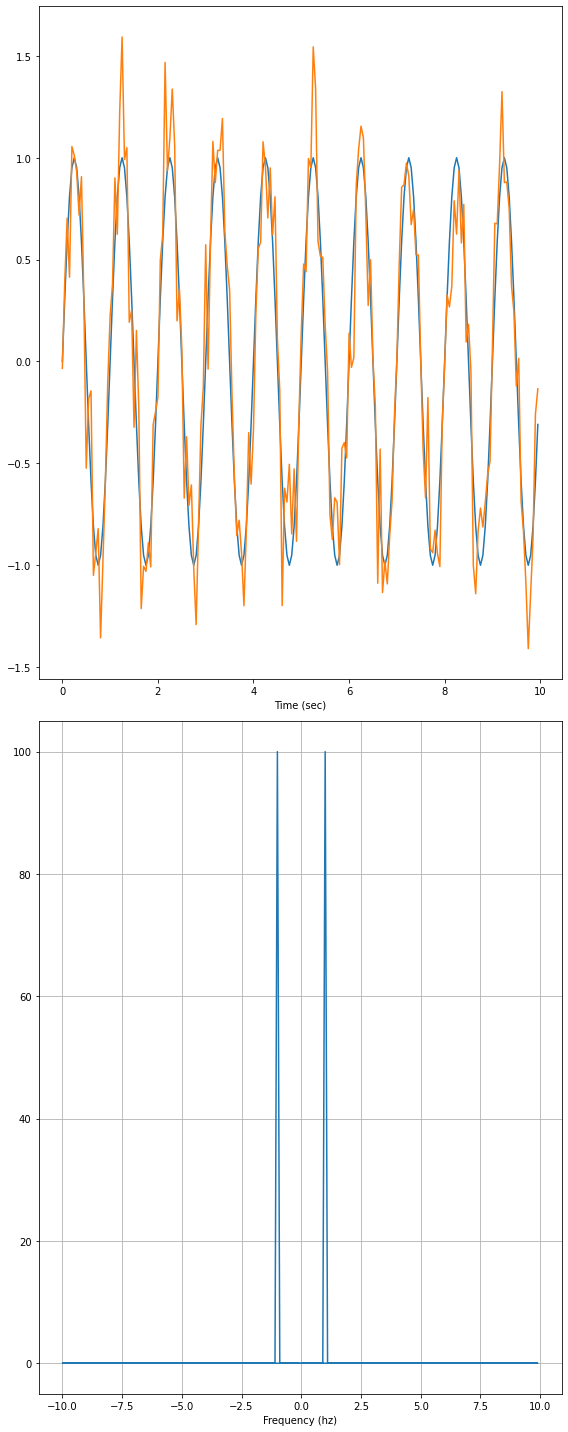

In [100]:
plt.figure(figsize=(8, 20))

plt.subplot(2, 1, 1)
plt.plot(time_vac,sig)
plt.plot(time_vac,sig_noise)

plt.xlabel('Time (sec)')


plt.subplot(2, 1, 2)
plt.plot(samp_freq,amplitude)

plt.xlabel('Frequency (hz)')

plt.tight_layout()
plt.grid()
plt.show()

To find the max ampplitude/noise

In [101]:
amp_frq = np.array([amplitude,samp_freq])
amp_frq

array([[ 2.08438717e-16,  1.33735308e-14,  1.92717014e-14,
         5.36429827e-15,  2.78582211e-14,  1.88231278e-14,
         1.66210238e-15,  8.06404802e-15,  1.66871460e-14,
         1.14594988e-14,  1.00000000e+02,  1.29431861e-14,
         9.81157968e-15,  2.46874686e-14,  9.72543312e-15,
         5.79063427e-15,  2.53204742e-14,  1.83818068e-14,
         2.87293784e-14,  4.14878897e-14,  2.35840001e-14,
         1.31249533e-14,  3.41671516e-15,  1.08093114e-14,
         2.15535685e-14,  3.04533353e-14,  2.07043055e-14,
         1.86485451e-14,  2.63646226e-14,  2.53219216e-14,
         3.64559157e-14,  3.88653116e-14,  3.43290859e-14,
         1.51783868e-14,  2.41493884e-14,  1.89015492e-14,
         1.81992838e-14,  3.57901369e-15,  1.60808758e-14,
         2.42112928e-14,  2.57967954e-14,  7.52217424e-15,
         6.95737316e-15,  1.24164887e-14,  1.37110621e-14,
         1.17670314e-14,  1.02918581e-14,  2.26068312e-14,
         1.89927791e-14,  1.46115630e-14,  1.87608742e-1

In [102]:
amp_frq.argmax()

10

In [103]:
amp_frq[0,:]

array([2.08438717e-16, 1.33735308e-14, 1.92717014e-14, 5.36429827e-15,
       2.78582211e-14, 1.88231278e-14, 1.66210238e-15, 8.06404802e-15,
       1.66871460e-14, 1.14594988e-14, 1.00000000e+02, 1.29431861e-14,
       9.81157968e-15, 2.46874686e-14, 9.72543312e-15, 5.79063427e-15,
       2.53204742e-14, 1.83818068e-14, 2.87293784e-14, 4.14878897e-14,
       2.35840001e-14, 1.31249533e-14, 3.41671516e-15, 1.08093114e-14,
       2.15535685e-14, 3.04533353e-14, 2.07043055e-14, 1.86485451e-14,
       2.63646226e-14, 2.53219216e-14, 3.64559157e-14, 3.88653116e-14,
       3.43290859e-14, 1.51783868e-14, 2.41493884e-14, 1.89015492e-14,
       1.81992838e-14, 3.57901369e-15, 1.60808758e-14, 2.42112928e-14,
       2.57967954e-14, 7.52217424e-15, 6.95737316e-15, 1.24164887e-14,
       1.37110621e-14, 1.17670314e-14, 1.02918581e-14, 2.26068312e-14,
       1.89927791e-14, 1.46115630e-14, 1.87608742e-14, 4.65001074e-14,
       4.50749832e-14, 1.95365752e-14, 4.28490227e-14, 2.66355708e-14,
      

In [106]:
amp_position= amp_frq[0,:].argmax()
amp_position

10

In [111]:
peak_freq = amp_frq[1,amp_position]

In [112]:
peak_freq

1.0

In [109]:
amp_frq[1,amp_frq.argmax()]

1.0

Remove the amplitude after the peak 

In [110]:
high_freq_fft = sig_fft.copy()

In [114]:
high_freq_fft[np.abs(samp_freq)>peak_freq] = 0

In [115]:
high_freq_fft

array([ 2.08438717e-16-0.00000000e+00j, -9.09714126e-15-9.80272136e-15j,
        1.77365578e-14-7.53743935e-15j,  2.56103464e-15-4.71346980e-15j,
        2.78544085e-14+4.60877272e-16j, -4.55522243e-15+1.82636274e-14j,
        1.27338105e-15+1.06821581e-15j,  5.96136562e-15-5.43056078e-15j,
        1.66483989e-14-1.13651070e-15j, -9.24281105e-15+6.77425699e-15j,
        2.58684253e-14-1.00000000e+02j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000

Filtered sig function in time domain

inverse fourier transform method

In [116]:
filtered_sig = fftpack.ifft(high_freq_fft)
filtered_sig

array([ 7.51126164e-16+0.00000000e+00j,  3.09016994e-01+1.42108547e-16j,
        5.87785252e-01-1.57772181e-32j,  8.09016994e-01+1.42108547e-16j,
        9.51056516e-01+7.88860905e-33j,  1.00000000e+00+2.27607160e-17j,
        9.51056516e-01-3.94430453e-32j,  8.09016994e-01-1.06581410e-16j,
        5.87785252e-01+1.57772181e-32j,  3.09016994e-01-1.56732884e-16j,
       -2.26116540e-16+8.35293082e-17j, -3.09016994e-01-1.98497538e-16j,
       -5.87785252e-01-7.11641704e-33j, -8.09016994e-01-6.01784602e-17j,
       -9.51056516e-01-4.17646541e-17j, -1.00000000e+00+4.44615181e-17j,
       -9.51056516e-01+0.00000000e+00j, -8.09016994e-01+1.11490586e-16j,
       -5.87785252e-01-1.35153260e-16j, -3.09016994e-01+1.79067216e-16j,
        1.70705216e-16-4.08280523e-32j,  3.09016994e-01+7.46100779e-17j,
        5.87785252e-01+6.75766299e-17j,  8.09016994e-01+3.46411628e-17j,
        9.51056516e-01+6.31088724e-32j,  1.00000000e+00-2.36626738e-17j,
        9.51056516e-01+1.35153260e-16j,  8.09016994

C:\Users\sruth\Anaconda3\envs\ML\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


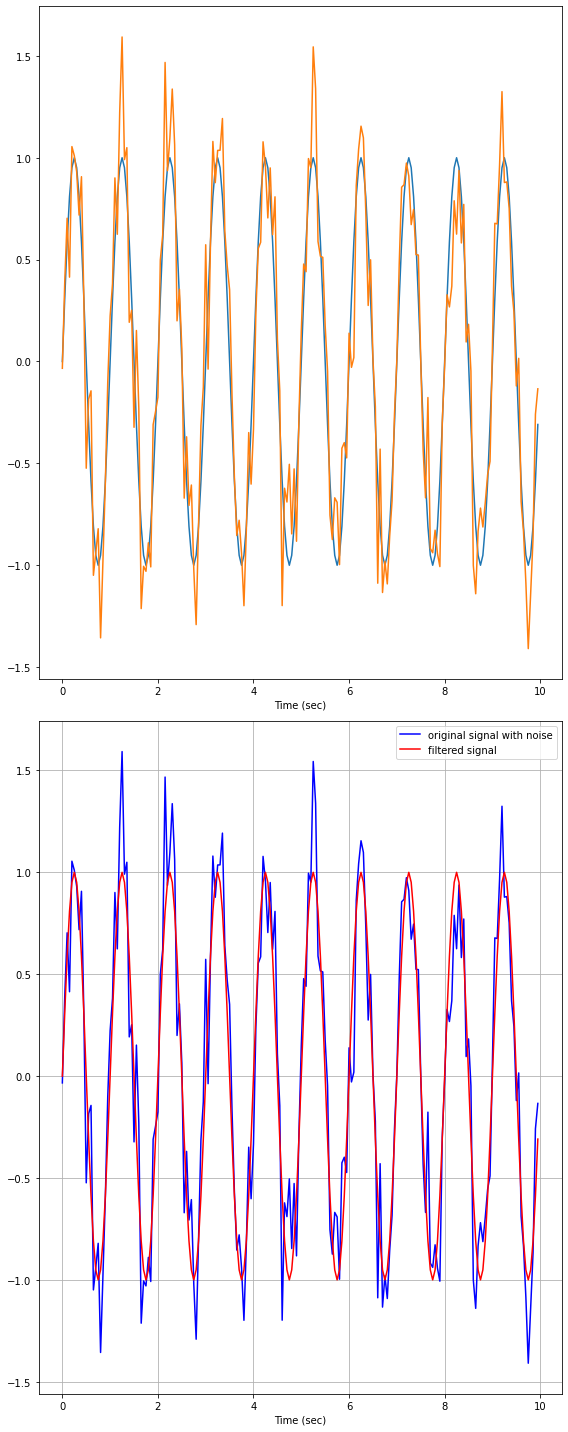

In [120]:
plt.figure(figsize=(8, 20))

plt.subplot(2, 1, 1)
plt.plot(time_vac,sig)
plt.plot(time_vac,sig_noise)

plt.xlabel('Time (sec)')


plt.subplot(2, 1, 2)
plt.plot(time_vac,sig_noise, color='b',label = 'original signal with noise')
plt.plot(time_vac,filtered_sig, color='red',label = 'filtered signal ')

plt.xlabel('Time (sec)')

plt.tight_layout()
plt.grid()
plt.legend()
plt.show()